<a href="https://colab.research.google.com/github/duydang2002/Anomaly-Intrusion-Detection/blob/main/AIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import sys
import numpy as np
import pandas as pd
import os
sys.path.insert(0, '/content/drive/MyDrive/AIDS')

os.chdir("/content/drive/MyDrive/AIDS")

In [3]:
# Read the data
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')
#train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
# train.describe()
# train.describe(include='object')
test.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,22544.000000,22544.000000,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.069996,31.629879,6.874157,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,0.397032,14.315780,3.210074,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,45.000000,9.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,2.000000,63.000000,10.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#train.head()
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [4]:
# Data preprocessing
# remove missing values (NaN)
train.dropna(inplace=True)
test.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
#This function, label_encoding, is defined to apply label encoding to categorical columns in a DataFrame.
#It iterates over each column, and if the column's dtype is 'object' (indicating it contains categorical data),
#it uses scikit-learn's LabelEncoder to transform the categorical values into numerical labels.
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,22,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,11,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
X_train[0]

array([ 0.        , -1.        , -0.33333333,  0.        , -0.12903226,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.0915493 ,  2.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        , -1.48538012,  0.33469388,  0.51578947, -0.42857143,
       16.66666667, 25.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

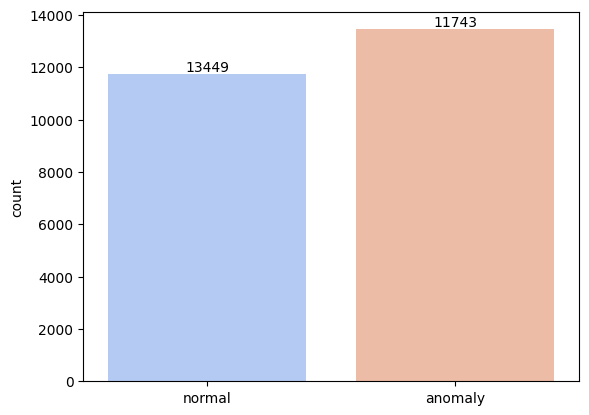

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=train["class"], palette=("coolwarm"))
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

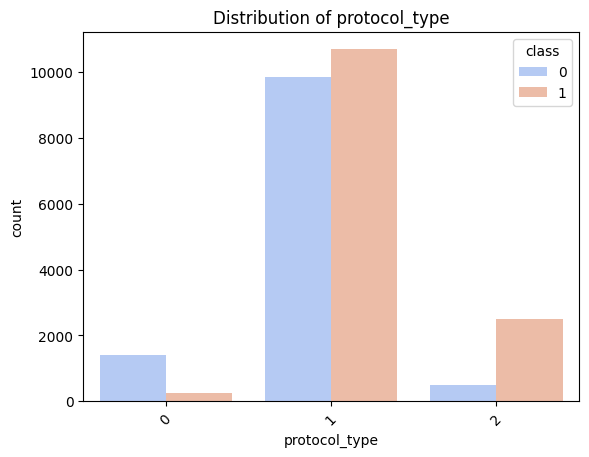

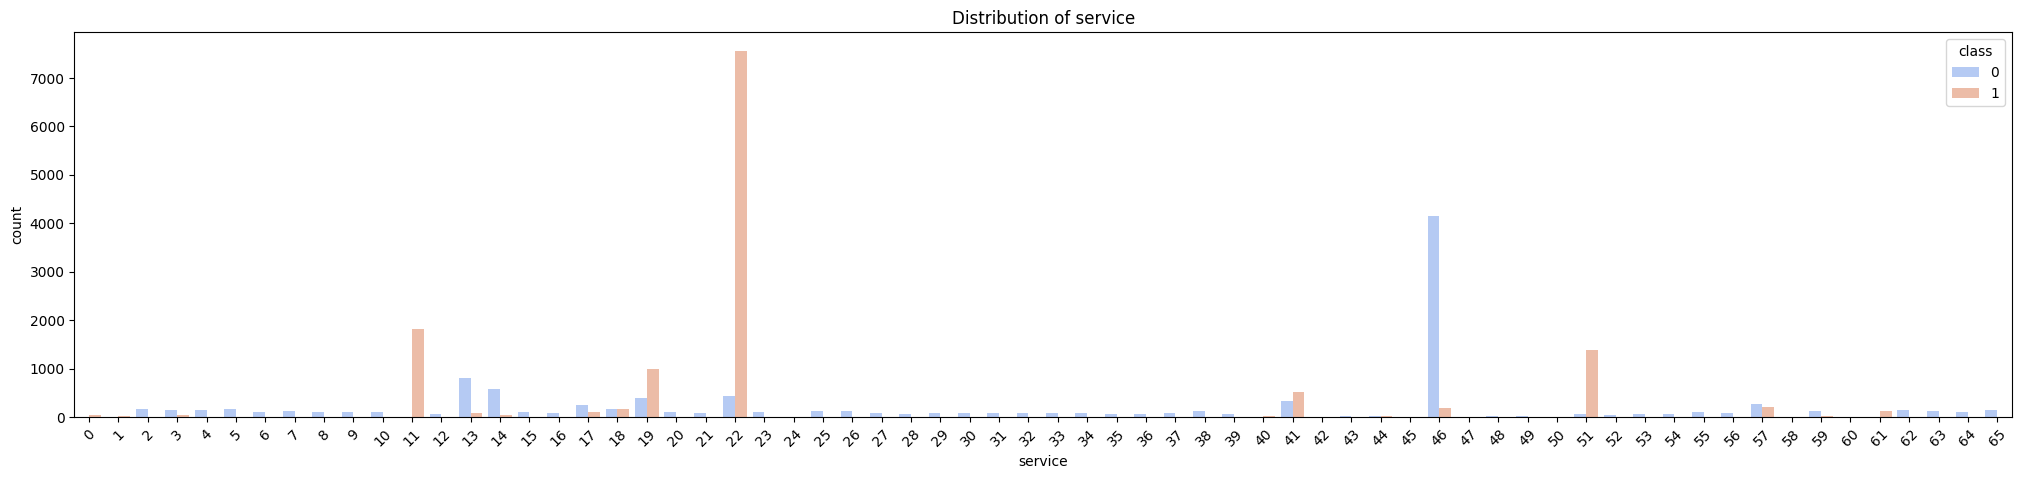

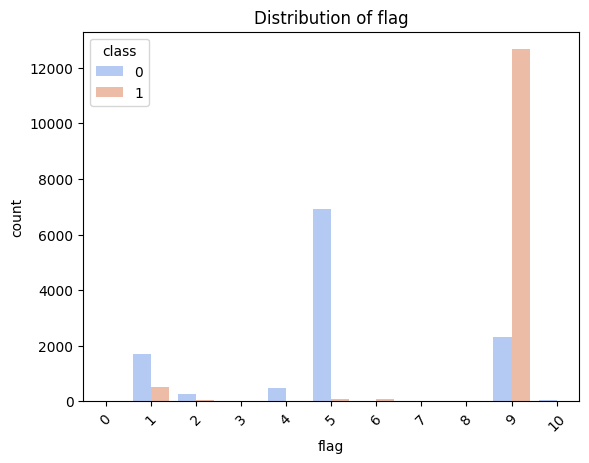

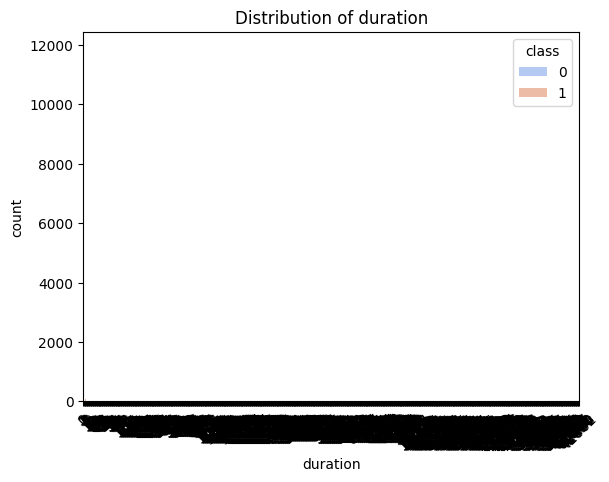

In [13]:
# categorical columns
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))
    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']);
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()


In [9]:
# split data for OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = train.drop(['class'], axis=1)
y = train['class']
#making X less sensitive to the impact of outliers - an observation or data point that significantly deviates from the rest of the data in a dataset..
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

7327  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9378
           1       0.79      0.94      0.86     10775

    accuracy                           0.84     20153
   macro avg       0.85      0.83      0.83     20153
weighted avg       0.85      0.84      0.83     20153



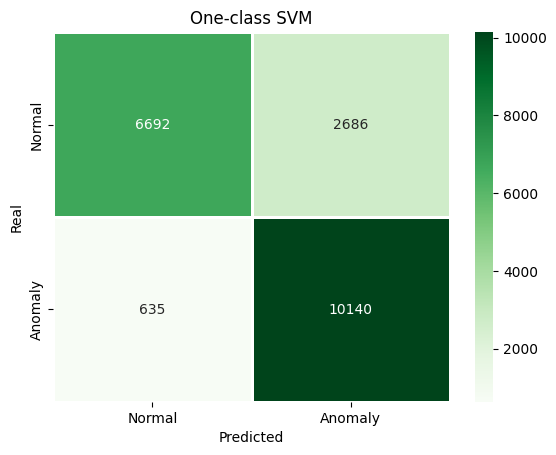

In [ ]:
# Using OneClassSVM
from sklearn.svm import OneClassSVM

# kernel='poly': Tham số này xác định loại hàm hạt nhân được sử dụng trong SVM. Poly là hàm phân thức
# Tham số 'nu' là giới hạn trên về tỷ lệ lỗi trong quá trình huấn luyện và giới hạn dưới về tỷ lệ vector hỗ trợ.
# Nó xác định sự cân đối giữa có đường ranh giới quyết định mượt mà và phân loại đúng điểm trong quá trình huấn luyện.
# gamma='scale': Tham số 'gamma' xác định tầm ảnh hưởng của một ví dụ huấn luyện duy nhất. 'scale' có nghĩa là nó được tính toán là 1 / (n_features * X.var()).
model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)

predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "One-class SVM")

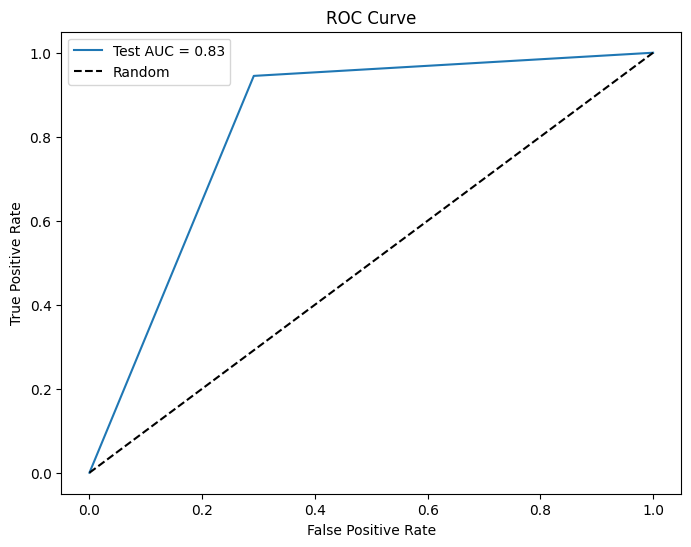

921  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1197
           1       0.78      0.94      0.86      1323

    accuracy                           0.83      2520
   macro avg       0.85      0.83      0.83      2520
weighted avg       0.85      0.83      0.83      2520



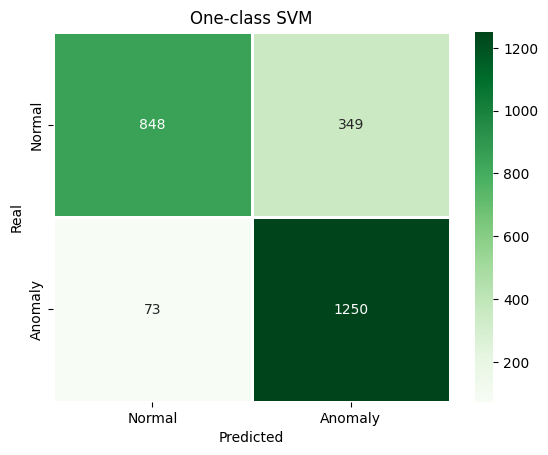

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = model.predict(X_test)
test_fpr, test_tpr, _ = roc_curve(y_test, predictions)
test_auc = auc(test_fpr, test_tpr)
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print_stats(predictions, X_test, y_test, "One-class SVM")

In [ ]:
X_testset = test
scaler = RobustScaler()
X_testset = scaler.fit_transform(X_testset)
predictions = model.predict(X_test)

for i, prediction in enumerate(predictions[:100]):
    print(f"Prediction for sample {i + 1}: {prediction}")

Prediction for sample 1: 1
Prediction for sample 2: -1
Prediction for sample 3: 1
Prediction for sample 4: 1
Prediction for sample 5: 1
Prediction for sample 6: 1
Prediction for sample 7: 1
Prediction for sample 8: 1
Prediction for sample 9: -1
Prediction for sample 10: 1
Prediction for sample 11: 1
Prediction for sample 12: -1
Prediction for sample 13: -1
Prediction for sample 14: -1
Prediction for sample 15: 1
Prediction for sample 16: 1
Prediction for sample 17: -1
Prediction for sample 18: 1
Prediction for sample 19: -1
Prediction for sample 20: 1
Prediction for sample 21: -1
Prediction for sample 22: -1
Prediction for sample 23: 1
Prediction for sample 24: 1
Prediction for sample 25: 1
Prediction for sample 26: -1
Prediction for sample 27: -1
Prediction for sample 28: 1
Prediction for sample 29: -1
Prediction for sample 30: 1
Prediction for sample 31: -1
Prediction for sample 32: 1
Prediction for sample 33: 1
Prediction for sample 34: 1
Prediction for sample 35: -1
Prediction for 

In [25]:
#  Using LSTM
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

auc_scores = []

max_epoch=25
nfolds=10
batch_size=128
model = None
test_fpr = None
test_tpr = None
test_auc = None
best_auc = 0.0
def build_Model():
  model = Sequential()
  model.add(SpatialDropout1D(0.5))
  model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
              optimizer='adam')
  return model

for fold in range(nfolds):
    print("fold {}/{}".format(fold+1, nfolds))
    X_train, X_Test, y_train, y_Test = train_test_split(X, y, random_state=42, train_size=0.9)

    model = build_Model();

    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.05)
    best_iter = -1

    for ep in range(max_epoch):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
        #print(X_train[0])
        model.fit(X_train, y_train, batch_size=batch_size, epochs=1)

        t_probs = model.predict(X_valid)
        t_auc = sklearn.metrics.roc_auc_score(y_valid,t_probs)
        print ('Epoch %d: Current auc = %f (best=%f)' % (ep, t_auc, best_auc))
        auc_scores.append(t_auc)
        if t_auc > best_auc:
          best_auc = t_auc
          best_iter = ep
          X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[1],1))
          probs = model.predict(X_Test)

          test_fpr, test_tpr, _ = roc_curve(y_Test, probs)
          test_auc = auc(test_fpr, test_tpr)
          print(sklearn.metrics.confusion_matrix(y_Test, probs > 0.5))

          os.chdir("/content/drive/MyDrive/AIDS")
          model.save('saved_model2.keras')
average_auc = np.mean(auc_scores)
print("Average AUC across all folds: {}".format(average_auc))

fold 1/10
36/36 [==============================] - 1s 11ms/step
Epoch 0: Current auc = 0.953306 (best=0.000000)
79/79 [==============================] - 1s 12ms/step
[[1000  165]
 [ 123 1232]]
36/36 [==============================] - 1s 22ms/step
Epoch 1: Current auc = 0.961013 (best=0.953306)
79/79 [==============================] - 2s 21ms/step
[[1000  165]
 [  41 1314]]
36/36 [==============================] - 0s 11ms/step
Epoch 2: Current auc = 0.981572 (best=0.961013)
79/79 [==============================] - 1s 11ms/step
[[ 991  174]
 [  29 1326]]
36/36 [==============================] - 0s 11ms/step
Epoch 3: Current auc = 0.989786 (best=0.981572)
79/79 [==============================] - 1s 12ms/step
[[1032  133]
 [  37 1318]]
36/36 [==============================] - 0s 11ms/step
Epoch 4: Current auc = 0.991977 (best=0.989786)
79/79 [==============================] - 1s 12ms/step
[[1068   97]
 [  38 1317]]
36/36 [==============================] - 0s 11ms/step
Epoch 5: Current auc 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

79/79 [==============================] - 3s 33ms/step
Prediction for sample 1: [0.9988291]
Prediction for sample 2: [0.9902015]
Prediction for sample 3: [0.99864423]
Prediction for sample 4: [0.99016595]
Prediction for sample 5: [0.99700373]
Prediction for sample 6: [0.9972191]
Prediction for sample 7: [0.9985494]
Prediction for sample 8: [0.99044555]
Prediction for sample 9: [0.00038617]
Prediction for sample 10: [0.9867228]
Prediction for sample 11: [0.6251356]
Prediction for sample 12: [0.00174448]
Prediction for sample 13: [0.00053601]
Prediction for sample 14: [0.00286257]
Prediction for sample 15: [0.99825543]
Prediction for sample 16: [0.99524873]
Prediction for sample 17: [0.00250415]
Prediction for sample 18: [0.37851873]
Prediction for sample 19: [0.00243879]
Prediction for sample 20: [0.99344707]
Prediction for sample 21: [0.00973861]
Prediction for sample 22: [0.00587835]
Prediction for sample 23: [0.9959366]
Prediction for sample 24: [0.99179024]
Prediction for sample 25: 

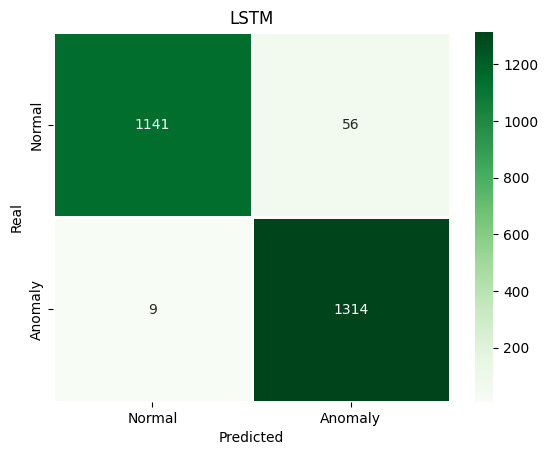

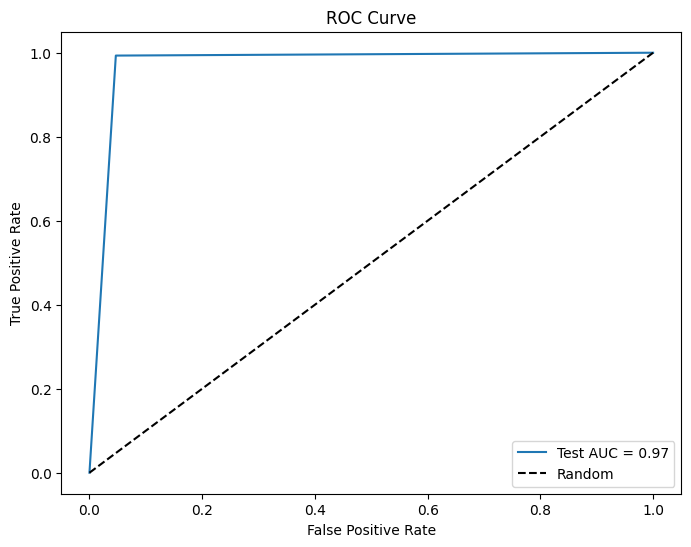

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pickle
import numpy as np
from keras.preprocessing import sequence
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

os.chdir("/content/drive/MyDrive/AIDS")

AIDS_model = load_model('saved_model2.keras')
# X_testset = test

# scaler = RobustScaler()
# X_testset = scaler.fit_transform(X_testset)
# prediction = AIDS_model.predict(X_testset)
predictions = AIDS_model.predict(X_test)

for i, prediction in enumerate(predictions[:100]):
    print(f"Prediction for sample {i + 1}: {prediction}")

predictions = np.round(predictions)
print(classification_report(y_test, predictions))
conf = confusion_matrix(y_pred=predictions,y_true=y_test)
plt.title("LSTM")
ax= plt.subplot()
sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
ax.set_xlabel('Predicted');
ax.set_ylabel('Real');
ax.xaxis.set_ticklabels(['Normal', 'Anomaly']);
ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
test_fpr, test_tpr, _ = roc_curve(y_test, predictions)
test_auc = auc(test_fpr, test_tpr)
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

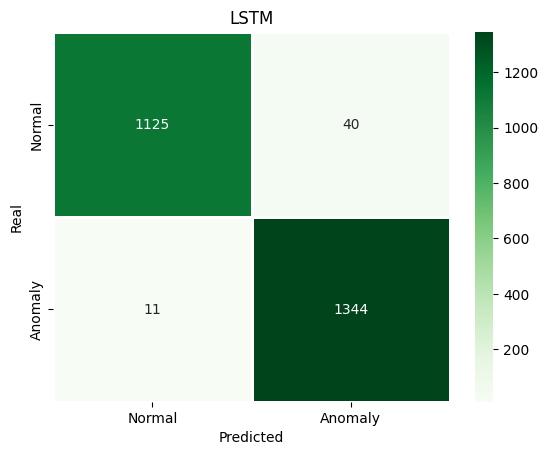

In [12]:
confusion_matrix = np.array([[1125, 40],
                             [11, 1344]])

plt.title("LSTM")
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt="", linewidths=2, cmap="Greens")
ax.set_xlabel('Predicted');
ax.set_ylabel('Real');
ax.xaxis.set_ticklabels(['Normal', 'Anomaly']);
ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
